In [108]:
import numpy as np 

#import tensorflow as tf 
import matplotlib.pyplot as plt 


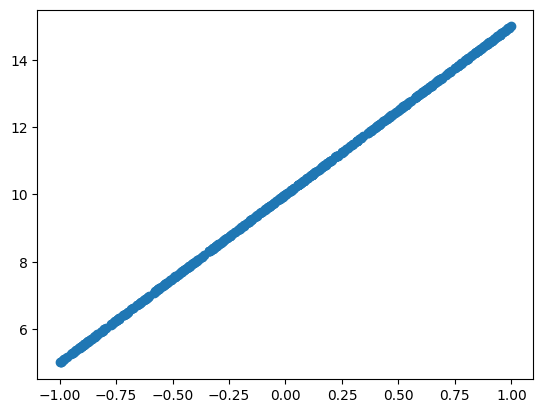

In [109]:
n = 500

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5]])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
plt.scatter(x[:,0],y_true)
plt.show()
#plt.scatter(x[:,1],y_true)

In [110]:
class MSE:
    
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_pred - y_true) ** 2).mean()

    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
        return self.gradient


class Linear:
    def __init__(self, input_dim: int, num_hidden: int = 1):
        self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
        self.bias = np.zeros(num_hidden)
  
    def __call__(self, x):
        self.x = x
        output = x @ self.weights + self.bias
        return output

    def backward(self, gradient):
        self.weights_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum(axis=0)
        self.x_gradient = gradient @ self.weights.T
        return self.x_gradient

    def update(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient
        
        
model=Linear(x.shape[1])      
loss = MSE()

In [111]:
from typing import Callable
def fit(x:np.ndarray,y:np.ndarray,model:callable,loss:callable,lr:float,num_epochs:int,plot_vis=False):
    j_history=[]
   
    #if plot_vis==True:
            #plt.scatter(x, y_true, marker='x', label='underlying function')
            
    
    for epoch in range(num_epochs+1):
        
        
        y_pred=model(x)
        loss_value=loss(y_pred,y)
        if plot_vis==True:
            if epoch%5==0:
                
                print(f'Epoch {epoch}, loss {loss_value}')
                #plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')
                plt.scatter(x, y_true, marker='.', label='underlying function')
                plt.plot(x[:,0], y_pred.squeeze(), color='r',label=f'Epoch {epoch}')
                plt.show()
        else:
            print(f'Epoch {epoch}, loss {loss_value}')
            
        j_history.append(loss_value)
        
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)
        
    #if plot_vis==True:
       # plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");
   
       
    return j_history    

In [112]:
model=Linear(x.shape[1])

loss=MSE()



Epoch 0, loss 118.5167213170217


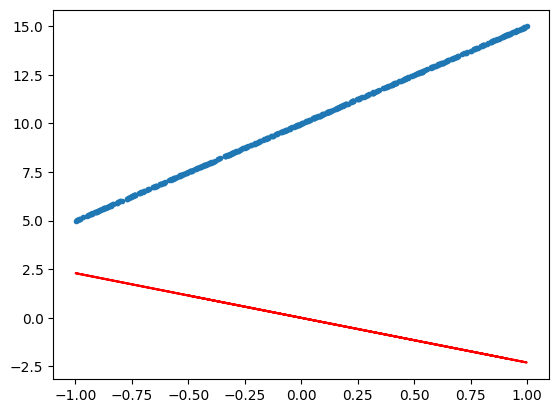

Epoch 5, loss 47.58634249924149


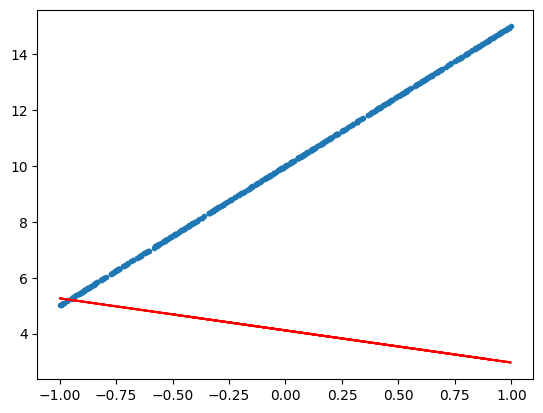

Epoch 10, loss 21.073087881700577


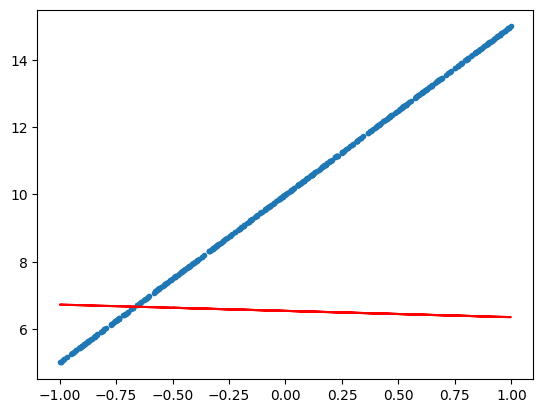

Epoch 15, loss 10.553523073862557


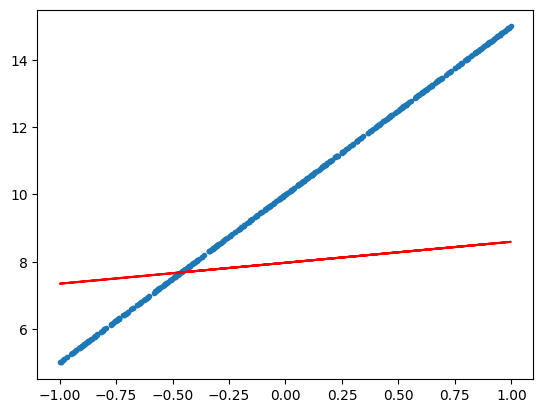

Epoch 20, loss 5.97327561005767


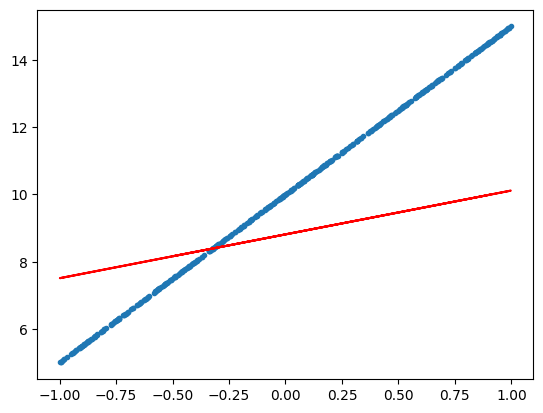

Epoch 25, loss 3.723520933819996


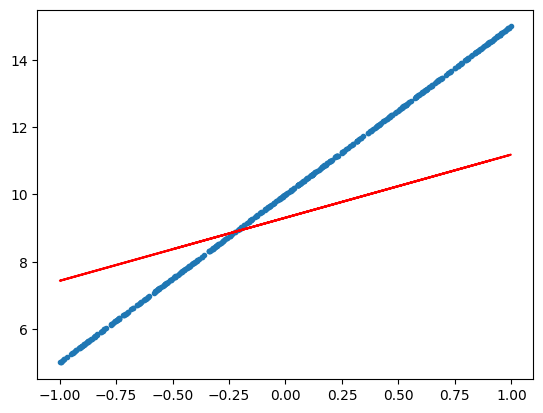

Epoch 30, loss 2.4721071334473512


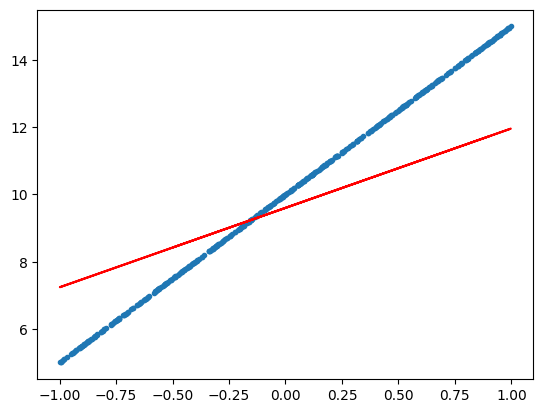

Epoch 35, loss 1.7016915954030638


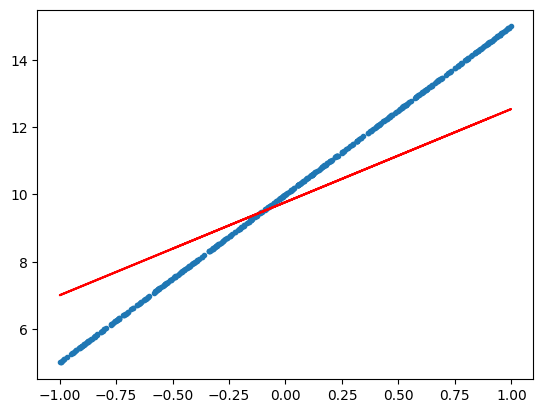

Epoch 40, loss 1.1940691317167698


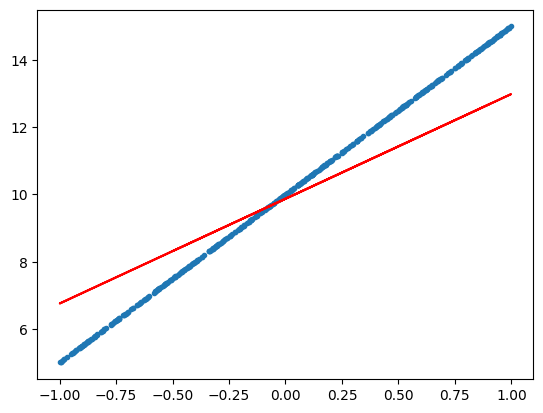

Epoch 45, loss 0.8460973623296814


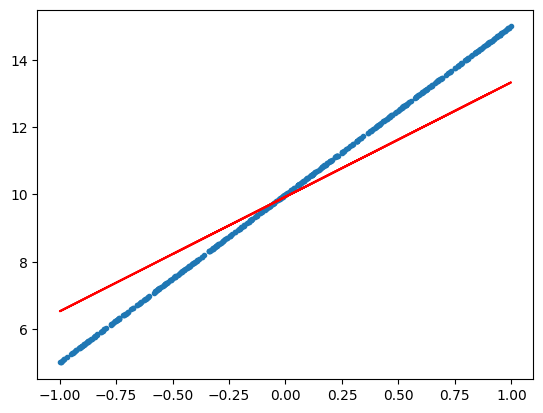

Epoch 50, loss 0.6024538717642481


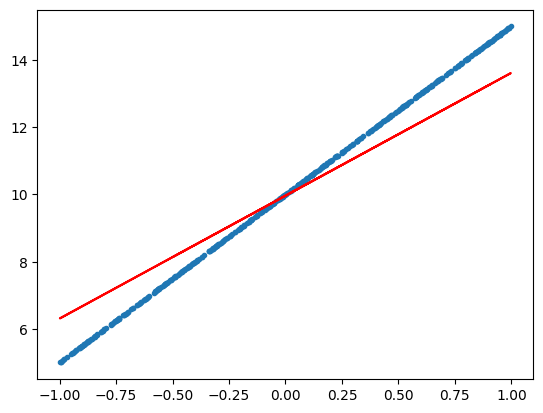

Epoch 55, loss 0.42999939611083865


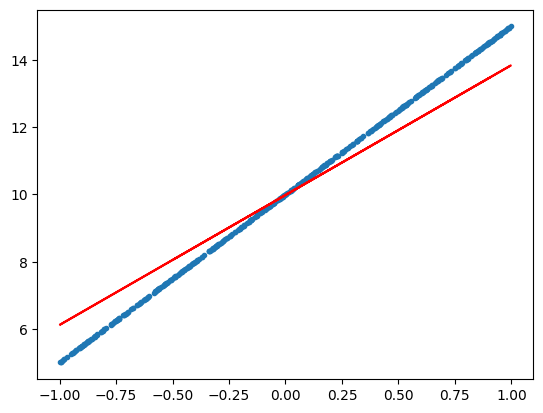

Epoch 60, loss 0.3072710751154195


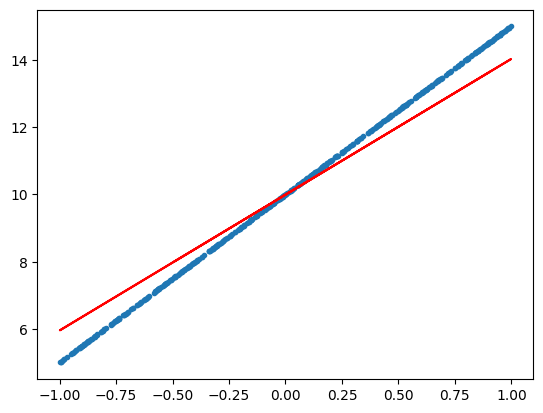

Epoch 65, loss 0.2196972389021983


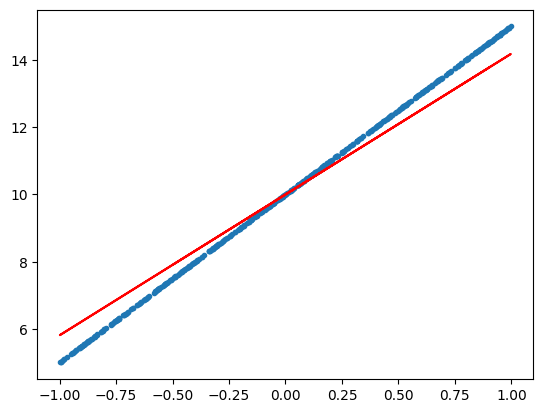

Epoch 70, loss 0.15712636488075624


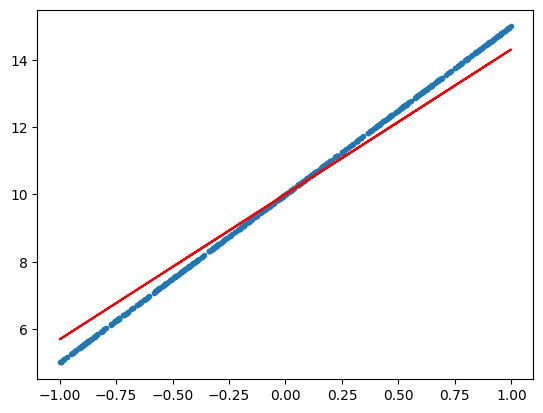

Epoch 75, loss 0.11239132736112858


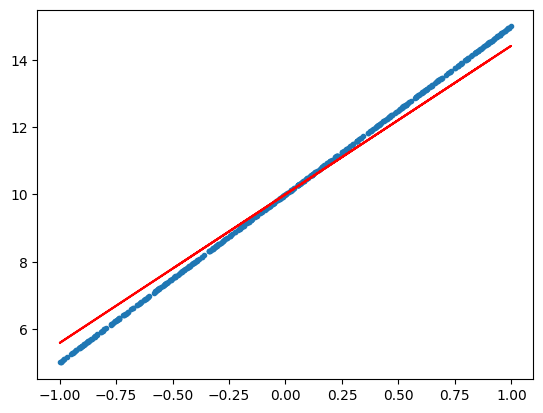

Epoch 80, loss 0.08039803482941359


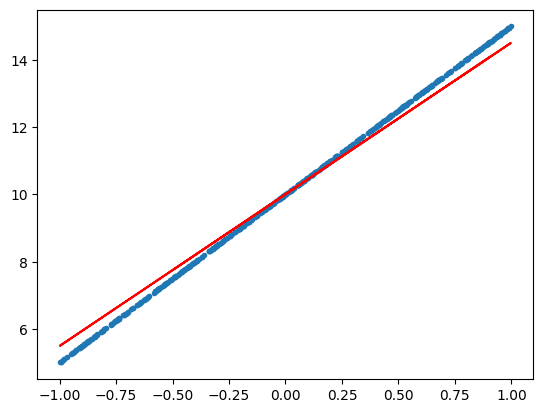

Epoch 85, loss 0.05751381172071954


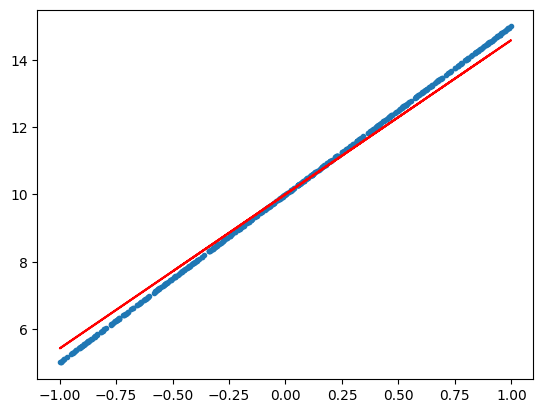

Epoch 90, loss 0.041143926384905626


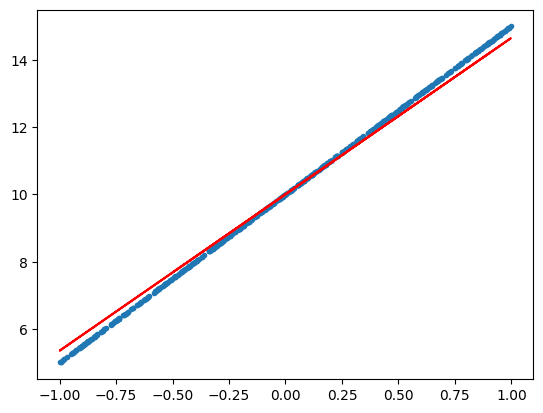

Epoch 95, loss 0.029433551167001224


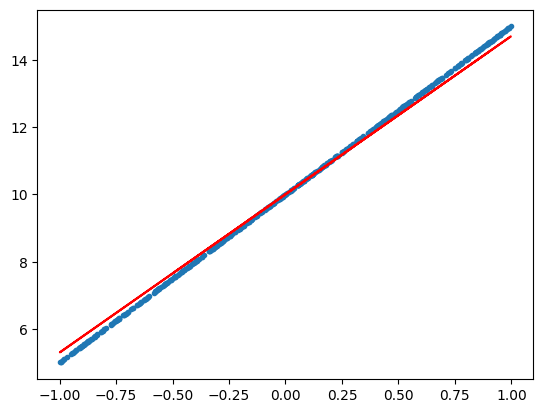

Epoch 100, loss 0.02105625941199547


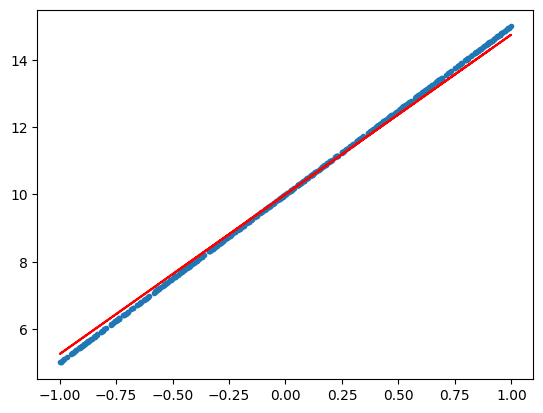

Epoch 105, loss 0.015063315644459596


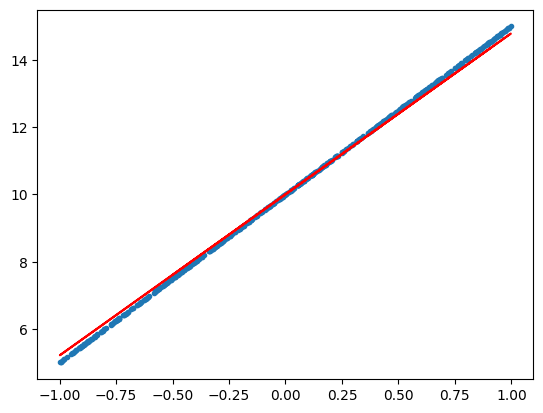

Epoch 110, loss 0.010776067872779882


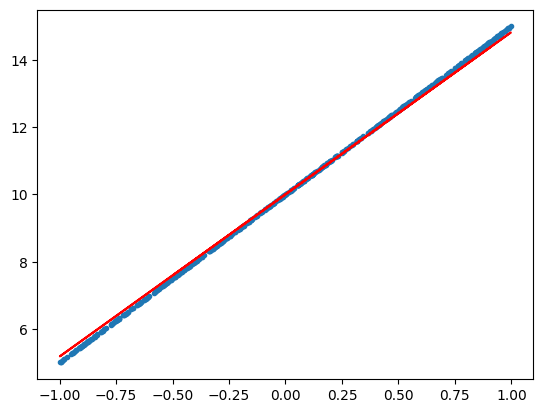

Epoch 115, loss 0.00770903909962902


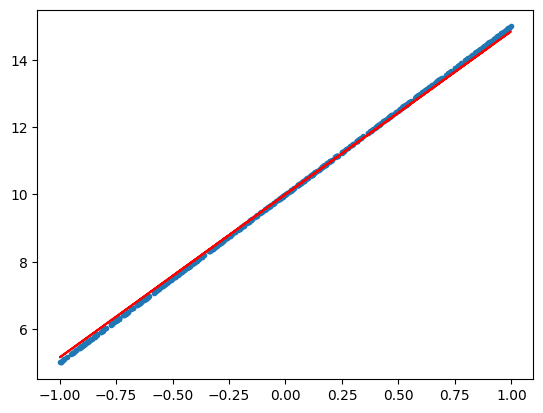

Epoch 120, loss 0.005514933381140009


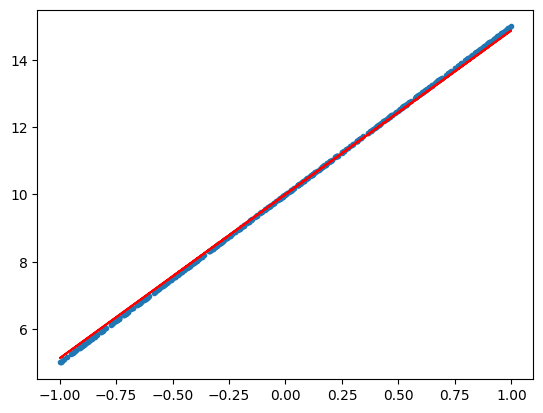

In [113]:
history=fit(x,y_true,model,loss,0.05,120,plot_vis=True)

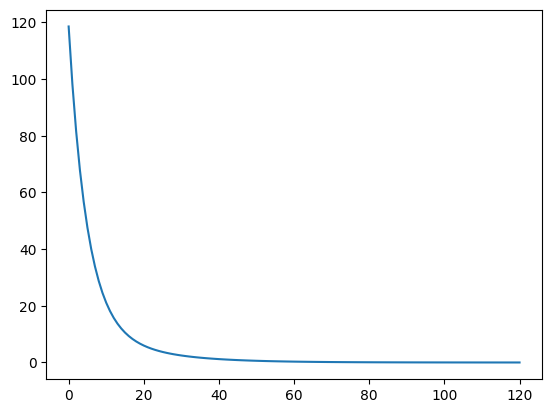

In [114]:
plt.plot(history)